In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Basics of Probability
# 1.
# Simulating 10,000 coin tosses
def simulate_coin_tosses(n=10000):
    head, tail = 0, 0
    for _ in range(n):
        outcome = random.choice(["Head", "Tail"])
        if outcome == "Head":
            head += 1
        else:
            tail += 1
    print(f"Heads Probability: {head/n:.4f}")
    print(f"Tails Probability: {tail/n:.4f}")

In [3]:
# Simulating rolling two dice and getting a sum of 7
def simulate_dice_rolls(n=10000):
    count_seven = 0
    for _ in range(n):
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)
        if die1 + die2 == 7:
            count_seven += 1
    print(f"Probability of rolling a sum of 7: {count_seven/n:.4f}")

In [8]:
# Running simulations
print("Coin Toss Simulation:")
simulate_coin_tosses()

print("\nDice Roll Simulation:")
simulate_dice_rolls()

Coin Toss Simulation:
Heads Probability: 0.4977
Tails Probability: 0.5023

Dice Roll Simulation:
Probability of rolling a sum of 7: 0.1660


In [13]:
# 2.
def estimate_probability(num_trials=10000):
    success_count = 0  # Tracks cases where at least one 6 is rolled

    for _ in range(num_trials):
        rolls = [random.randint(1, 6) for _ in range(10)]  # Simulating 10 rolls
        if 6 in rolls:
            success_count += 1  # Count trial as success if at least one 6 is present

    probability = success_count / num_trials
    return probability

# Run the simulation
estimated_prob = estimate_probability()
print(f"Estimated Probability of rolling at least one '6' in 10 rolls: {estimated_prob:.4f}")

Estimated Probability of rolling at least one '6' in 10 rolls: 0.8409


In [17]:
#Conditional Probability and Bayes' Theorem

# Define the bag of balls
colors = ["red"] * 5 + ["green"] * 7 + ["blue"] * 8
num_trials = 1000

# Simulate the draws
draws = [random.choice(colors) for _ in range(num_trials)]

# Count occurrences
total_blue = 0
red_after_blue = 0

for i in range(1, num_trials):
    if draws[i-1] == "blue":  # Previous ball was blue
        total_blue += 1
        if draws[i] == "red":  # Current ball is red
            red_after_blue += 1

# Compute conditional probability P(Red | Blue)
prob_red_given_blue = red_after_blue / total_blue

# Compute probabilities for Bayes' theorem verification
prob_red = 5 / 20  # P(Red)
prob_blue = 8 / 20  # P(Blue)
prob_blue_given_red = sum(draws[i-1] == "red" and draws[i] == "blue" for i in range(1, num_trials)) / sum(draws[i-1] == "red" for i in range(1, num_trials))

# Bayes' theorem: P(Red | Blue) = (P(Blue | Red) * P(Red)) / P(Blue)
bayes_estimate = (prob_blue_given_red * prob_red) / prob_blue

# Print results
print(f"Estimated P(Red | Blue): {prob_red_given_blue:.4f}")
print(f"Bayes' theorem estimate: {bayes_estimate:.4f}")
print(f"Difference: {abs(prob_red_given_blue - bayes_estimate):.4f}")


Estimated P(Red | Blue): 0.2630
Bayes' theorem estimate: 0.2408
Difference: 0.0223


In [24]:
#Random Variables and Discrete Probability
# Define possible values and corresponding probabilities
values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.4]
sample_size = 1000

# Generate the sample
sample = np.random.choice(values, size=sample_size, p=probabilities)

# Compute statistics
mean_empirical = np.mean(sample)
variance_empirical = np.var(sample, ddof=0)  # Population variance
std_dev_empirical = np.std(sample, ddof=0)   # Population standard deviation

# Print results
print(f"Empirical Mean: {mean_empirical:.4f}")
print(f"Empirical Variance: {variance_empirical:.4f}")

print(f"Empirical Standard Deviation: {std_dev_empirical:.4f}")

Empirical Mean: 2.1370
Empirical Variance: 0.6242
Empirical Standard Deviation: 0.7901


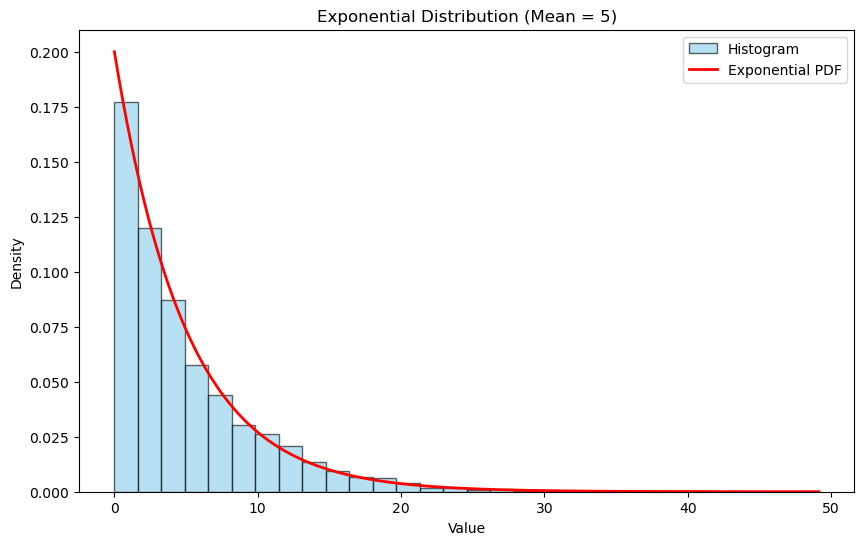

In [4]:
#Continuous Random Variables
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = 5            
num_samples = 2000  

samples = np.random.exponential(scale=mean, size=num_samples)

# b. Visualization using matplotlib

# Create a histogram 
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(
    samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black',
    label='Histogram'
)


x = np.linspace(0, np.max(samples), 1000)

pdf = (1/mean) * np.exp(-x/mean)


plt.plot(x, pdf, 'r', linewidth=2, label='Exponential PDF')


plt.title('Exponential Distribution (Mean = 5)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.show()


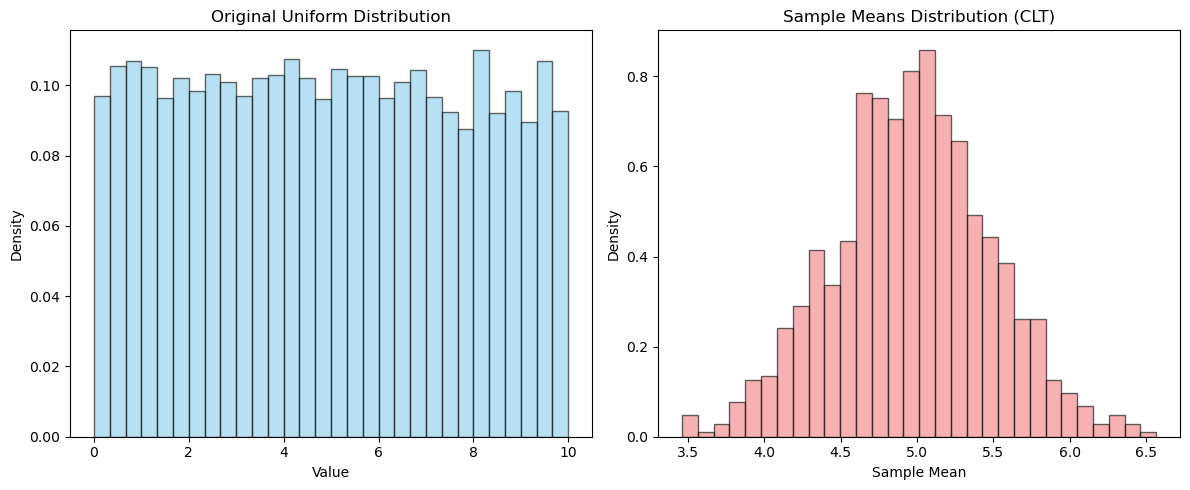

In [ ]:
#Central Limit Theorem
# Step 1: Generate 10,000 random numbers from a uniform distribution (range: 0 to 10)
np.random.seed(42)
uniform_data = np.random.uniform(0, 10, 10000)

# Step 2: Draw 1000 samples (size n = 30) and compute their means
sample_size = 30
num_samples = 1000
sample_means = [np.mean(np.random.choice(uniform_data, size=sample_size, replace=True)) for _ in range(num_samples)]

# Step 3: Visualize both distributions side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# a) Histogram of original uniform distribution
axes[0].hist(uniform_data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
axes[0].set_title("Original Uniform Distribution")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")

# b) Histogram of sample means (approximates normal distribution)
axes[1].hist(sample_means, bins=30, density=True, alpha=0.6, color='lightcoral', edgecolor='black')
axes[1].set_title("Sample Means Distribution (CLT)")
axes[1].set_xlabel("Sample Mean")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()